In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train= pd.read_csv('titanic.csv')
test= pd.read_csv('train_test.csv')

In [16]:
train.shape

(891, 12)

In [17]:
test.shape

(418, 11)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
train.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)

In [44]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
train['Embarked'].fillna('S',inplace=True)

In [31]:
test['Fare'].fillna(test['Fare'].mean( ),inplace=True)

In [37]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [38]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [41]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\dell\AppData\Local\Temp\ipykernel_9016\1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [43]:
test['Age'][test['Age'].isnull()] = test_age

C:\Users\dell\AppData\Local\Temp\ipykernel_9016\4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [45]:
# EDA

In [48]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [49]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [50]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_9016\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

<Axes: xlabel='Age', ylabel='Density'>

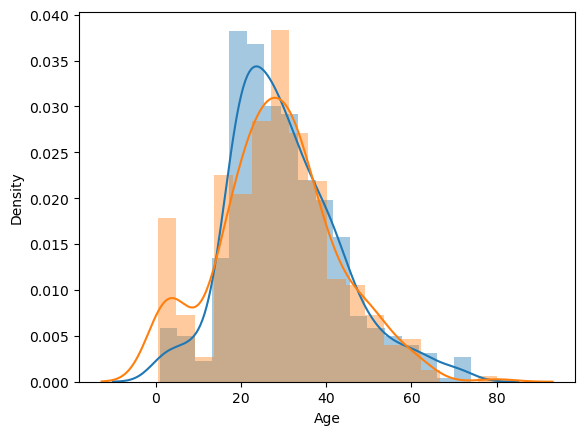

In [54]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\dell\AppData\Local\Temp\ipykernel_9016\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

<Axes: xlabel='Fare', ylabel='Density'>

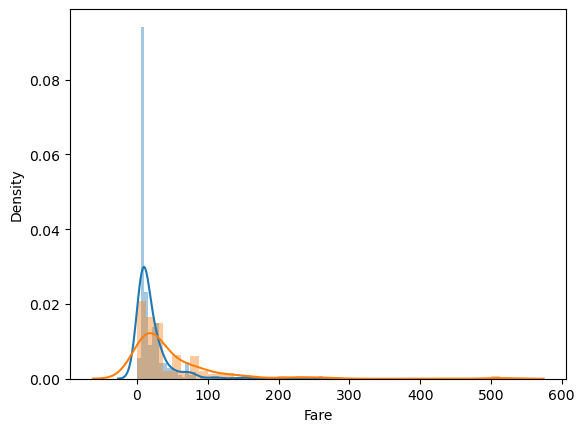

In [55]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [56]:
train.drop(columns='Ticket',inplace=True)

In [62]:
test.drop(columns='Ticket',inplace=True)

In [60]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [63]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [61]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [67]:
def cal(number):
    if number ==1:
        return 'Alon'
    elif number >1 and number<=5:
        return 'Medium'
    else:
        return 'Large'
    

In [71]:
train['family_size'] = train['family'].apply(cal)

In [73]:
test['family_size'] = test['family'].apply(cal)

In [77]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)

In [78]:
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [81]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [83]:
PassengerId = test['PassengerId'].values

In [85]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [90]:
train= pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True).astype('int')

In [92]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Survived            891 non-null    int32
 1   Age                 891 non-null    int32
 2   Fare                891 non-null    int32
 3   Pclass_2            891 non-null    int32
 4   Pclass_3            891 non-null    int32
 5   Sex_male            891 non-null    int32
 6   Embarked_Q          891 non-null    int32
 7   Embarked_S          891 non-null    int32
 8   family_size_Large   891 non-null    int32
 9   family_size_Medium  891 non-null    int32
dtypes: int32(10)
memory usage: 34.9 KB


In [93]:
test= pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True).astype('int')

In [94]:
X = train.drop(columns='Survived')

In [95]:
y= train['Survived']

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [101]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
y_pred = classifier.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7988826815642458

In [105]:
xf= test.iloc[:,:].values

In [108]:
y_final = classifier.predict(xf)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
y_final.shape

(418,)

In [115]:
final = pd.DataFrame()

In [116]:
final['PassengerId'] = PassengerId
final['Survived'] = y_final

In [118]:
final.to_csv('Submission.csv',index=False)